## Marianne Trujillo Alltamirano
### Exp. 740694
01/03/2023

# Examen B Módulo 1 - Optimización.

**Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_MoralesGabriel*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`,`B`) o (`Esc`,`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

---
# Primer punto. Optimización de funciones con `SymPy` (34 puntos)

**Costo mínimo**. Imagine un contenedor rectangular sin tapa que debe satisfacer las siguientes condiciones:

- Este contenedor debe tener un volumen **V**.
- La longitud de su base es el doble que el de su ancho.
- El material para la base cuesta 12.00 MXN por cada $m^2$.
- El material para los lados cuesta 6.00 MXN por cada $m^2$.

¿Cuál es el costo del contenedor más barato?


1. Escriba el costo **C** del contenedor como una función del ancho de la base $x$ y de su altura $h$. Realice este punto usando $\LaTeX$ y celdas *Markdown*.

**1.Criterio de optimización**

Minimizar el costo del contenedor

**2. Variables que afectan mi criterio**

Longitudes de la base y la altura del contenedor

**3. Función de costo**
$$24x^2+36xh$$

**4. Información adicional**
- La longitud de su base es el doble que el de su ancho.
- El material para la base cuesta 12.00 MXN por cada $m^2$.
- El material para los lados cuesta 6.00 MXN por cada $m^2$.

2. Determina las dimensiones del contenedor si el volumen debe ser de $12m^3$.

In [1]:
import sympy as sp
import numpy as np

sp.var ("x")
sp.var ("h")
sp.var ("v")

costo = 24*x**2+36*x*h
volumen = 2*x**2*h - 12
volumen

2*h*x**2 - 12

In [3]:
x_num = sp.solve(volumen, x)[1]
x_num

sqrt(6)*sqrt(1/h)

In [4]:
costo_h= costo.subs(x,x_num)
costo_h

36*sqrt(6)*h*sqrt(1/h) + 144/h

In [5]:
dcosto= sp.diff(costo_h,h)
dcosto

18*sqrt(6)*sqrt(1/h) - 144/h**2

In [6]:
pc= sp.solve(dcosto,h)
pc

[2*6**(2/3)/3]

In [7]:
float(sp.diff(dcosto,h).subs(h,pc[0])) #ES UN MÍNIMO

20.25

In [8]:
x_max=float(sp.solve(volumen,x)[1].subs(h,pc[0])) #VALOR DE X 
x_max

1.6509636244473134

In [9]:
2*1.1447142425533319

2.2894284851066637

In [10]:
h_max= float(sp.solve(volumen,h)[0].subs(x,x_max))
h_max

2.201284832596418

 ### **R:** Las dimensiones del contenedor si el volumen es de $12m^3$, son:
- **Longitud de base**= 1.6509636244473134 m
- **Ancho de base**= 2.2894284851066637 m
- **Alto del contenedor**= 2.201284832596418 m

3. ¿Cuál fue el costo de fabricar este contenedor?

In [11]:
float(costo.subs(x,x_max).subs(h,pc[0]))

196.24902402587108

 ### **R:** El costo mínimo es de: 196.24902402587108 MXN

### Corrección
* ¿Cuál fue el error? Que no contemplé que el contenedor tiene dos lados que su área corresponde a 2xh y otros dos que su área corresponde a xh
* ¿Qué se corrigió? La función de costo, pues en lugar de $24x^2+12xh$,  es:  $24x^2+36 xh$
* ¿Cómo se puede evitar? Poniendo más atención a la hora de plantear mi s ecuaciones de acuerdo alos datos que me da el problema

---
# Segundo punto. Programación lineal (33 puntos)

Una empresa se dedica a fabricar tarjetas de control para automóviles, y están en su momento de planeación de compras anuales. Hay 3 proveedores que pueden proveer los componentes, cada uno a su propio precio.

<table>
  <tr>
      <th>  </th>
      <th>Proveedor 1</th>
      <th>Proveedor 2</th>
      <th>Proveedor 3</th>
      <th>Demanda</th>
  </tr>
  <tr>
      <th>Componente 1</th>
      <td>0.5</td>
      <td>0.6</td>
      <td>0.7</td>
      <td>15000</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Componente 2</th>
      <td>0.7</td>
      <td>0.5</td>
      <td>0.6</td>
      <td>20000</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Componente 3</th>
      <td>0.32</td>
      <td>0.54</td>
      <td>0.8</td>
      <td>12000</td>
  </tr>

  <tr style="border-bottom: 1px solid #000;">
      <th>Capacidad</th>
      <td> 21000 </td>
      <td> 16000 </td>
      <td> 16000 </td>
      <td>  </td>
  </tr>
</table>

El proveedor tiene restricciones de capacidad de fabricación del tipo de componentes, por lo que un proveedor no puede satisfacer nuestra demanda completa para cada componente.

Se desea conocer la cantidad que se debe comprar de cada componente a cada proveedor para gastar la menor cantidad de dinero posible, pero al mismo tiempo lograr satisfacer la demanda para poder continuar con la manufactura del producto.

1. Escriba la función a **minimizar** junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma \begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}\qquad\text{(23 puntos)}
\end{equation}

**1.Criterio de optimización**

Minimizar el costo de satisfacer la demanda y producción

**2. Variables que afectan mi criterio**

Capacidad de oferta y demanda de cada proveedor

**3. Función de costo**
$$\min_{x_1,\dots,x_6}0.5x_{p1c1} + 0.7x_{p1c2} + 0.32x_{p1c3} + 0.6x_{p2c1} + 0.5x_{p2c2} + 0.54x_{p2c3}+ 0.7x_{p3c1} + 0.6x_{p3c2} + 0.8x_{p3c3}$$

**4. Información adicional: Restricciones**

- $x_{p1c1} + x_{p1c2} + x_{p1c3} \leq 21000$
- $x_{p2c1} + x_{p2c2} + x_{p2c3} \leq 16000$
- $x_{p3c1} + x_{p3c2} + x_{p3c3} \leq 16000$


- $x_{p1c1} + x_{p2c1} + x_{p3c1} \geq 15000$
- $x_{p1c2} + x_{p2c2} + x_{p3c2} \geq 20000$
- $x_{p1c3} + x_{p2c3} + x_{p3c3} \geq 12000$

2. Resuelva el problema utilizando la función `linprog`. ¿Cómo debe ser la distribución de compras? ¿Cuánto dinero se necesita para satisfacer la demanda? (10 puntos)

In [12]:
import scipy.optimize as opt
import numpy as np

c = np.array([0.5,
              0.7,
              0.32,
              0.6,
              0.5,
              0.54,
              0.7,
              0.6,
              0.8
              ])


Aub = np.array([[1, 1, 1, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 1, 1, 1, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 1, 1, 1],
                [-1, 0, 0, -1, 0, 0, -1, 0, 0],
                [0, -1, 0, 0, -1, 0, 0, -1, 0],
                [0, 0, -1, 0, 0, -1, 0, 0, -1]
              ])

bub = np.array([21000,
                16000,
                16000,
                -15000,
                -20000,
                -12000
               ])



opt.linprog(c, Aub, bub)

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: 22940.0
       ineqlin:  marginals: array([-0.2 , -0.1 , -0.  , -0.7 , -0.6 , -0.52])
  residual: array([   0.,    0., 6000.,    0.,    0.,    0.])
         lower:  marginals: array([0.  , 0.3 , 0.  , 0.  , 0.  , 0.12, 0.  , 0.  , 0.28])
  residual: array([ 9000.,     0., 12000.,     0., 16000.,     0.,  6000.,  4000.,
           0.])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 6
         slack: array([   0.,    0., 6000.,    0.,    0.,    0.])
        status: 0
       success: True
         upper:  marginals: array([0., 0., 0., 0., 0., 0., 0., 0., 0.])
  residual: array([inf, inf, inf, inf, inf, inf, inf, inf, inf])
             x: array([ 9000.,     0., 12000.,     0., 16000.,     0.,  6000.,  4000.,
           0.])

**Análisis de resultados** 

El costo mínimo es de \$22,940

La cantidad que se compra del *Proveedor 1* de:

* **Componente 1** es de 9000 unidades
* **Componente 2** es de 0 unidades
* **Componente 3** es de 12000 unidades

La cantidad que se compra del *Proveedor 2*  de:

* **Componente 1** es de 0 unidades
* **Componente 2** es de 16000 unidades
* **Componente 3** es de 0 unidades


La cantidad que se compra del *Proveedor 3* de:

* **Componente 1** es de 0 unidades
* **Componente 2** es de 6000 unidades
* **Componente 3** es de 4000 unidades

### Corrección
* ¿Cuál fue el error? Que las restricciones de mayor que las tomé como igualdades 
* ¿Qué se corrigió? En lugar de meter mis datos en Aeq y beq los puse todos en Aub/bub
* ¿Cómo se puede evitar? Prestando atención al planteamiento 

# Tercer punto. Ajuste de curvas (33 puntos)

Utiliza el archivo adjunto en Canvas en el apartado que corresponde al examen.

Escribe tu número de expediente: 740694

Lee el archivo y extrae la siguiente información:
- $x$ es la primer columna del archivo
- $y$ es la columna correspondiente a los últimos dos dígitos de tu número de expediente + 1. E.g. mi expediente es $693871$; por lo tanto, debo usar la columna $72$.

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
import pandas as pd
data = pd.read_excel("E01-RegresionLineal.xlsx")

x = data[0].values 
y = data[95].values

m = len(y)
ones = np.ones([m, 1])
x1 = np.reshape(x, [m, 1])
x2 = np.reshape(x**2, [m, 1])
x3 = np.reshape(x**3, [m, 1])
x4 = np.reshape(x**4, [m, 1])
x5 = np.reshape(x**5, [m, 1])

X1 = np.hstack((ones, x1))
X3 = np.hstack((ones, x1, x2, x3))
X5 = np.hstack((ones, x1, x2, x3, x4, x5))

beta_inicial1 = np.random.rand(2)
beta_inicial2 = np.random.rand(4)
beta_inicial3 = np.random.rand(6)

y_vector = np.reshape(y, [m, 1])

def foo(beta, X, y) :
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    prediccion = X @ beta
    error = prediccion - y
    return (error.T @ error)[0][0]

In [94]:
sol1 = opt.minimize(foo, beta_inicial1, args=(X1, y_vector))
sol2 = opt.minimize(foo, beta_inicial2, args=(X3, y_vector))
sol3 = opt.minimize(foo, beta_inicial3, args=(X5, y_vector))
sol3

      fun: 964.2161619724111
 hess_inv: array([[ 1.75214248e-02, -1.51804718e-01,  4.01739571e-01,
        -4.49285618e-01,  2.23580199e-01, -4.08303491e-02],
       [-1.51804718e-01,  1.76360635e+00, -5.26510798e+00,
         6.29192493e+00, -3.26568080e+00,  6.14009810e-01],
       [ 4.01739571e-01, -5.26510798e+00,  1.67963448e+01,
        -2.09365464e+01,  1.11890424e+01, -2.14944127e+00],
       [-4.49285618e-01,  6.29192493e+00, -2.09365464e+01,
         2.68719742e+01, -1.46731921e+01,  2.86557668e+00],
       [ 2.23580199e-01, -3.26568080e+00,  1.11890424e+01,
        -1.46731921e+01,  8.14523115e+00, -1.61155959e+00],
       [-4.08303491e-02,  6.14009810e-01, -2.14944127e+00,
         2.86557668e+00, -1.61155959e+00,  3.22233200e-01]])
      jac: array([ 0.00000000e+00, -7.62939453e-06,  0.00000000e+00,  0.00000000e+00,
        7.62939453e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 126
      nit: 14
     njev: 18
   status: 0
  success:

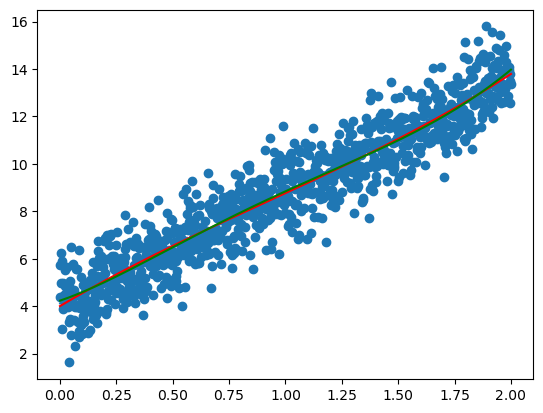

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.scatter(x, y)
plt.plot(x, X1 @ sol1.x)
plt.plot(x, X3 @ sol2.x, "r")
plt.plot(x, X5 @ sol3.x, "g")


1. Ajuste los datos con polinomios de grados 1, 3, y 5. Muestre los errores de forma gráfica. ¿Qué polinomio se ajusta mejor?

<BarContainer object of 3 artists>

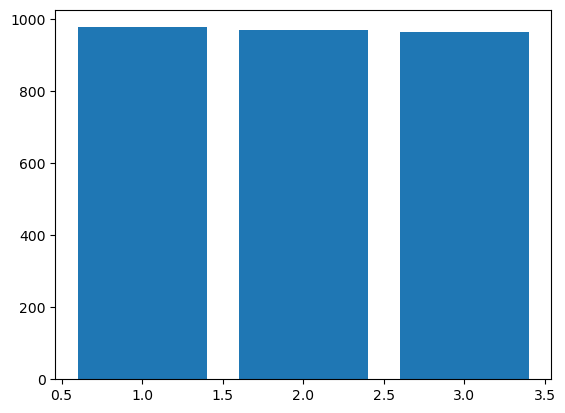

In [90]:
plt.figure()
plt.bar([1, 2, 3], [sol1.fun, sol2.fun, sol3.fun])

### **Respuesta**
Se ajusta mejor el polinomio de grado 5

2. Muestre en un gráfico los datos y el polinomio que mejor se ajuste.

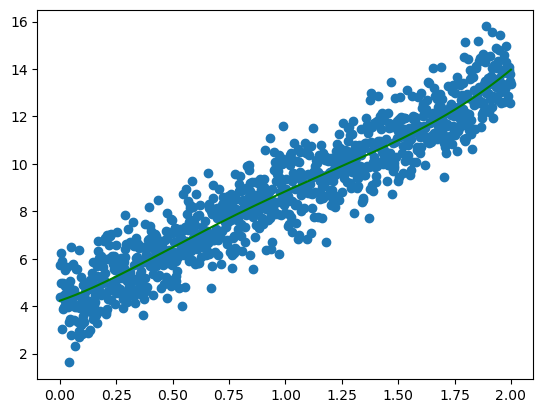

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.scatter(x, y)
plt.plot(x, X5 @ sol3.x, "g")


3. Use el modelo para averiguar el valor de $y$ cuando:
- $x=0.001$
- $x=-0.1$
- $x=2.1$

In [96]:
sol3

      fun: 964.2161619724111
 hess_inv: array([[ 1.75214248e-02, -1.51804718e-01,  4.01739571e-01,
        -4.49285618e-01,  2.23580199e-01, -4.08303491e-02],
       [-1.51804718e-01,  1.76360635e+00, -5.26510798e+00,
         6.29192493e+00, -3.26568080e+00,  6.14009810e-01],
       [ 4.01739571e-01, -5.26510798e+00,  1.67963448e+01,
        -2.09365464e+01,  1.11890424e+01, -2.14944127e+00],
       [-4.49285618e-01,  6.29192493e+00, -2.09365464e+01,
         2.68719742e+01, -1.46731921e+01,  2.86557668e+00],
       [ 2.23580199e-01, -3.26568080e+00,  1.11890424e+01,
        -1.46731921e+01,  8.14523115e+00, -1.61155959e+00],
       [-4.08303491e-02,  6.14009810e-01, -2.14944127e+00,
         2.86557668e+00, -1.61155959e+00,  3.22233200e-01]])
      jac: array([ 0.00000000e+00, -7.62939453e-06,  0.00000000e+00,  0.00000000e+00,
        7.62939453e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 126
      nit: 14
     njev: 18
   status: 0
  success:

**R:** $x=0.001$

In [136]:
def f(x) :
    return 4.23513326 + 3.23360735*x + 4.49007313*x**2 - 4.77117081*x**3 + 1.84658576*x**4 -0.18958577*x**5

f(0.001)

4.238371352653806

**R:** $x=-0.1$

In [137]:
def f(x) :
    return 4.23513326 + 3.23360735*x + 4.49007313*x**2 - 4.77117081*x**3 + 1.84658576*x**4 -0.18958577*x**5

f(-0.1)

3.961630981543699

**R:** $x=2.1$

In [138]:
def f(x) :
    return 4.23513326 + 3.23360735*x + 4.49007313*x**2 - 4.77117081*x**3 + 1.84658576*x**4 -0.18958577*x**5

f(2.1)

14.810828517518297

4. ¿Qué diferencias encuentra en cuanto a la interpolación y la extrapolación?

**Respuesta:** 
+ Que con la interpolación estimamos los valores que están dentro de un conjunto de datos, mientras que con la extrapolación estimamos los que están fuera de este conjunto.
+ La extrapolación puede llegar a ser más precisa en la predicción de valores, pues observo que aplicando el método de interpolación mi error sigue siendo muy alto.

5. (Punto extra) Agregue un termino $\beta_5 cos(10x)$ a su modelo y grafique los resultados. ¿Mejoró el resultado?